
## Part A

In [1]:
% Parameters
k1 = 7.2e7; % M^-1 min^-1
k_neg1 = 0.3; % min^-1
keR = 0.03; % min^-1
keC = 0.3; % min^-1
krec = 0.08; % min^-1
kdegR = 0.0022; % min^-1
kdegL = 0.01; % min^-1
fR = 0.2; % ratio
fL = 0.5; % ratio
NA = 6.022e23; % mol^-1
syms NRt NRi NRs Vs;
NRt = 50000; % receptors per cell
NRt == NRi + NRs;
Vs == keR * NRs - krec*(1-fR)*NRi;
[soli, sols, solv] = solve(NRt == NRi + NRs, Vs == keR * NRs - krec*(1-fR)*NRi, keR*NRs == NRi * (kdegR*fR + krec*(1-fR)));
soli = double(soli) % receptors per cell

soli = 1.5883e+04

In [2]:
sols = double(sols) % receptors per cell

sols = 3.4117e+04

In [3]:
solv = double(solv) % receptors per cell per second

solv = 6.9886

## Part B


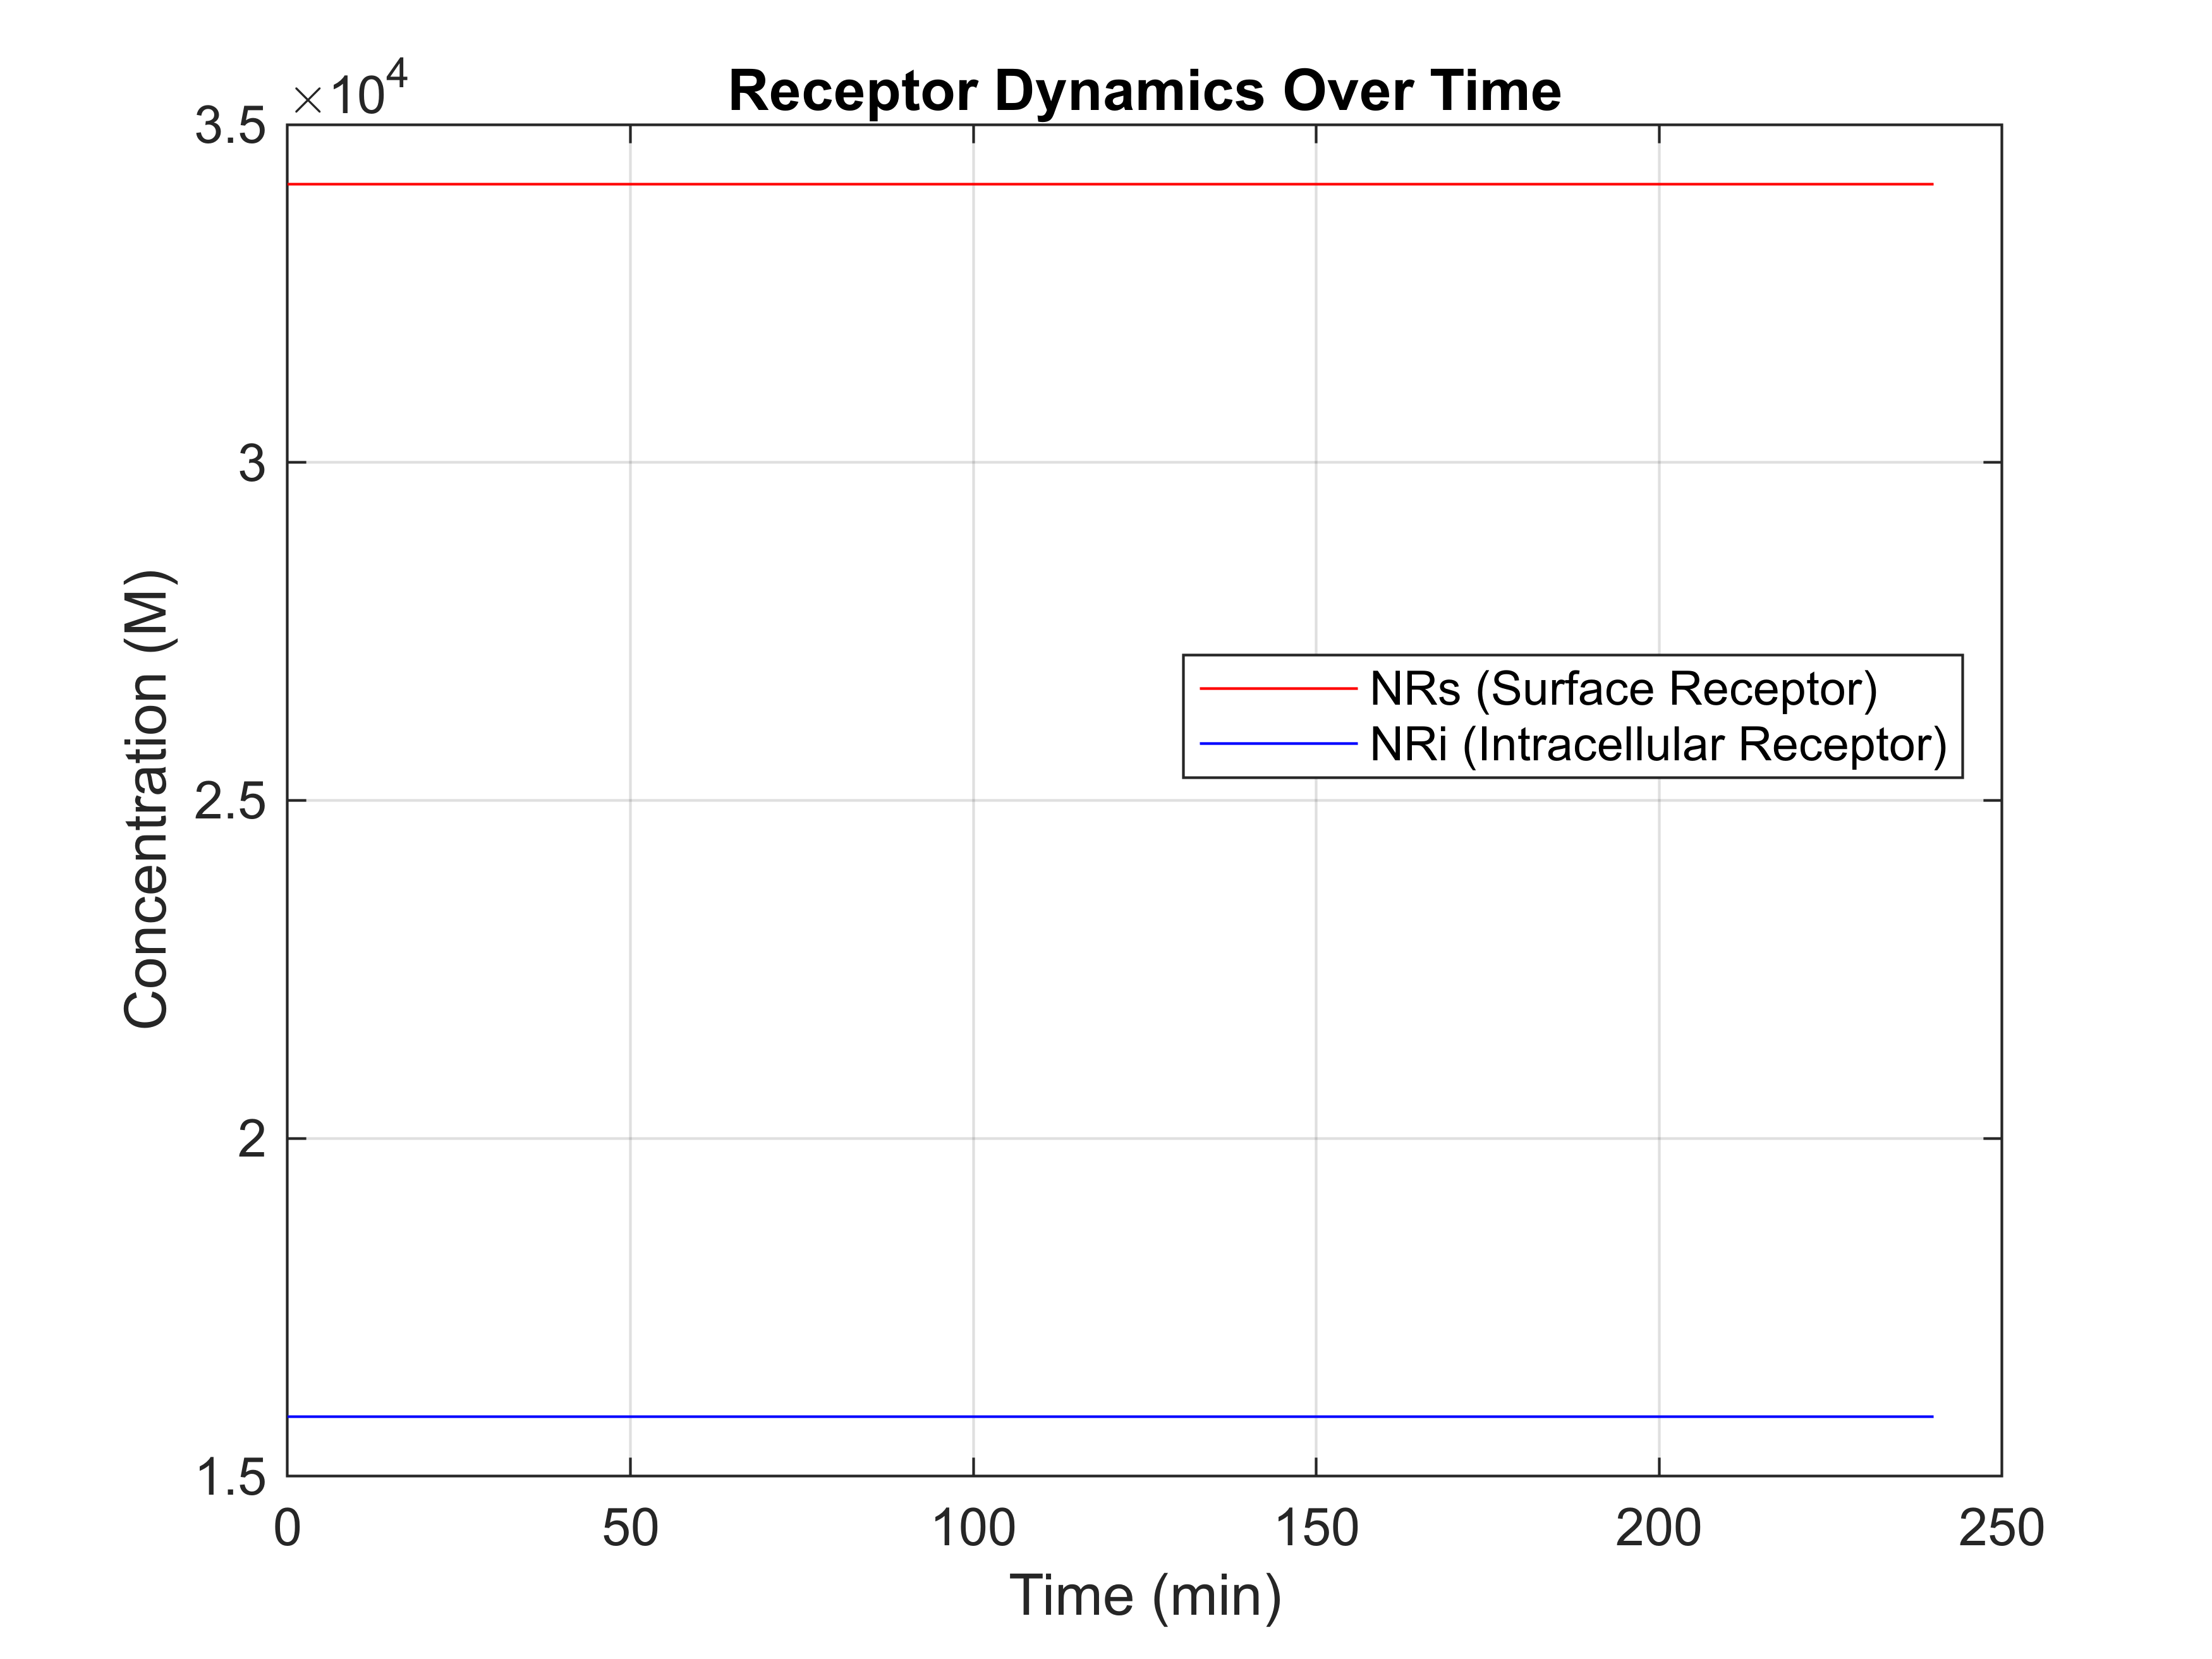

In [4]:
function dYdt = receptors_dynamics(t, Y)
    k1 = 7.2e7; % M^-1 min^-1
    k_neg1 = 0.3; % min^-1
    keR = 0.03; % min^-1
    keC = 0.3; % min^-1
    krec = 0.08; % min^-1
    kdegR = 0.0022; % min^-1
    kdegL = 0.01; % min^-1
    fR = 0.2; % ratio
    fL = 0.5; % ratio
    NA = 6.022e23; % mol^-1
    Vs = 6.9886; % receptors per cell per second
    NRi = Y(1); % Intracellular receptor
    NRs = 50000 - NRi; % Surface receptor assuming no ligand
    % Differential equations
    dNRs = -k1 * 0 * NRs - keR * NRs + (1 - fR) * krec * NRi + Vs; % Using CL = 0
    dNRi = keR * NRs - (kdegR * fR + (1 - fR) * krec) * NRi; % Intracellular receptor

    dYdt = [dNRi]; % Return derivatives
end

Y0 = [soli]; % Initial condition: [NRi]
tspan = [0, 240]; % Time in minutes
[t, Y] = ode45(@receptors_dynamics, tspan, Y0); % Solve ODEs

NRi = Y(:, 1); % Extract NRi
NRs = 50000 - NRi; % Calculate NRs

% Plot results
figure;
plot(t, NRs, '-r', 'DisplayName', 'NRs (Surface Receptor)');
hold on;
plot(t, NRi, '-b', 'DisplayName', 'NRi (Intracellular Receptor)');
xlabel('Time (min)');
ylabel('Concentration (M)');
title('Receptor Dynamics Over Time');
legend('Location', 'best');
hold off;
grid on;

In [5]:

% Display approximate steady-state values
disp('Approximate Steady-State Values:');

Approximate Steady-State Values:

In [6]:
disp(table({'NRs', 'NRi'}', [NRs(end), NRi(end)]', ...
    'VariableNames', {'Variable', 'Value'}));

    Variable    Value
    ________    _____
    {'NRs'}     34117
    {'NRi'}     15883

## Part C


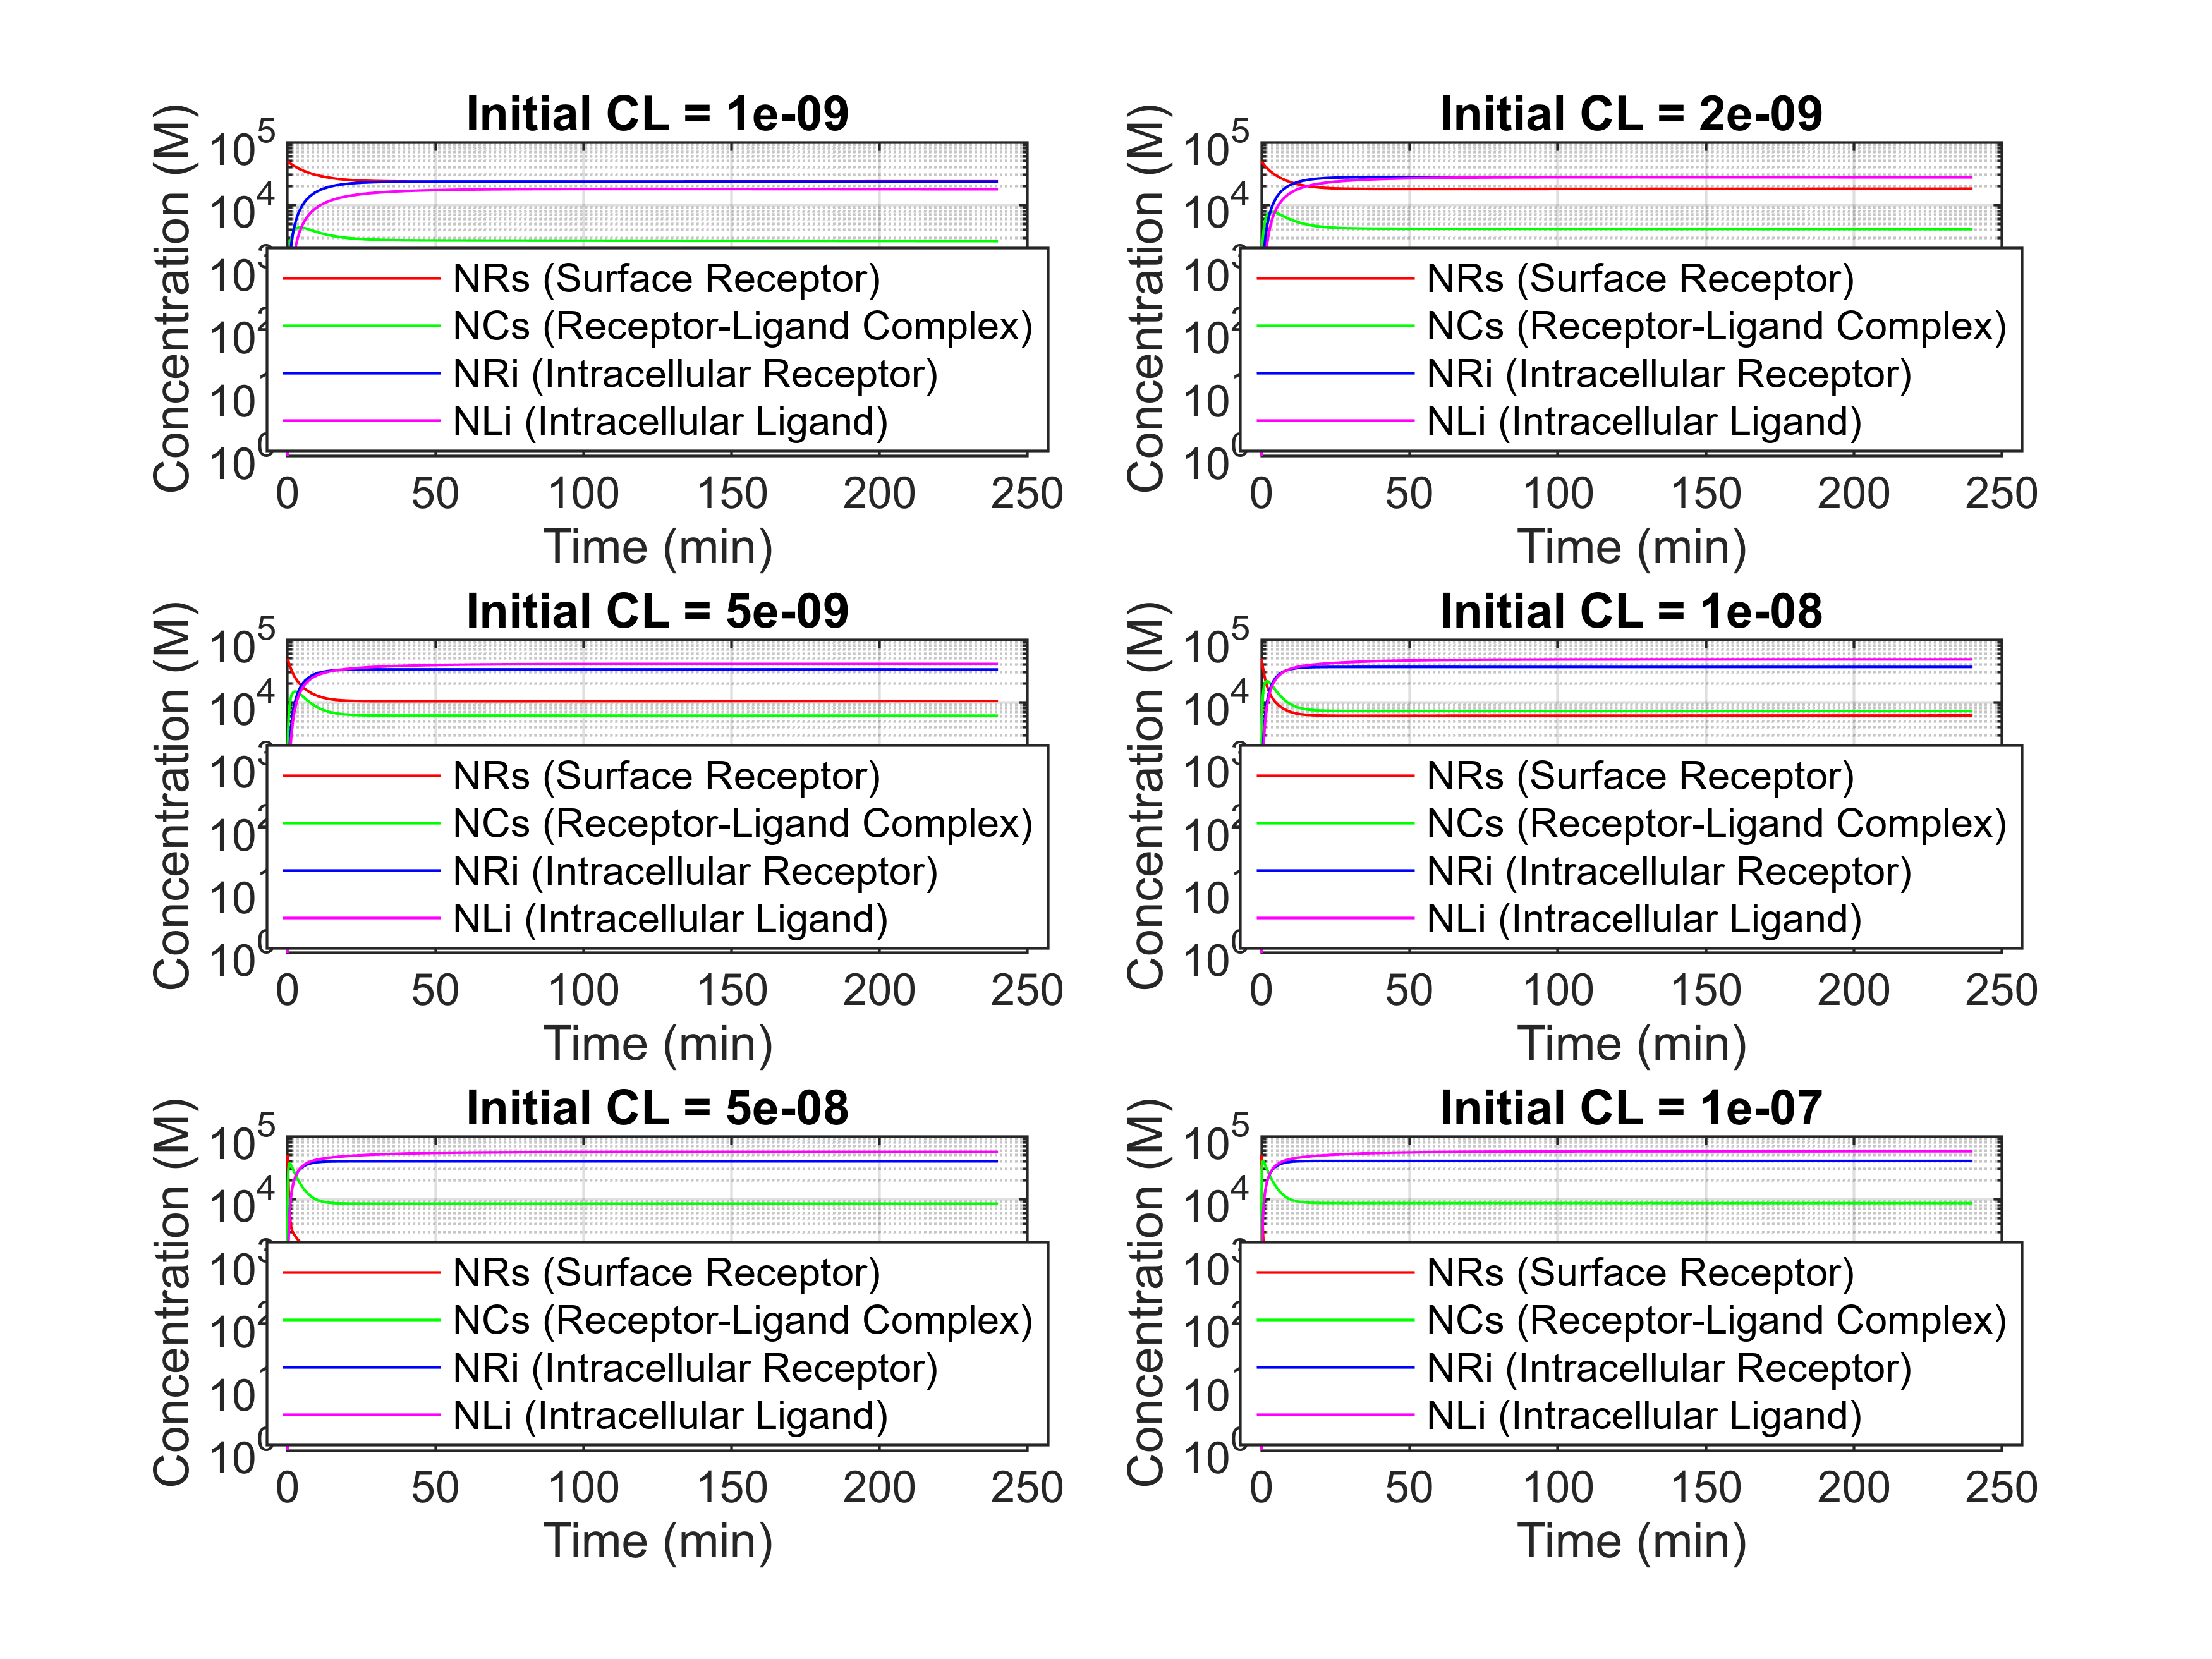

In [7]:
function dYdt = receptor_dynamics(t, Y)
    % Parameters
    k1 = 7.2e7; % M^-1 min^-1
    k_neg1 = 0.3; % min^-1
    keR = 0.03; % min^-1
    keC = 0.3; % min^-1
    krec = 0.08; % min^-1
    kdegR = 0.0022; % min^-1
    kdegL = 0.01; % min^-1
    fR = 0.2; % ratio
    fL = 0.5; % ratio
    NA = 6.022e23; % mol^-1
    nc = 1e9; % cells/mL
    Vs = 6.9886; % receptors per cell per second

    % Variables: Y = [CL, NCs, NRi, NLi]
    CL = Y(1); % Ligand concentration
    NCs = Y(2); % Receptor-ligand complex
    NRi = Y(3); % Intracellular receptor
    NLi = Y(4); % Intracellular ligand
    NRs = 50000 - NCs - NRi; % Surface receptor

    % Differential equations
    dNRs = -k1 * CL * NRs + k_neg1 * NCs - keR * NRs + (1 - fR) * krec * NRi + Vs;
    dNCs = k1 * CL * NRs - (k_neg1 + keC) * NCs;
    dNRi = keR * NRs + keC * NCs - (kdegR * fR + (1 - fR) * krec) * NRi;
    dNLi = keC * NCs - NLi * (kdegL * fL + (1 - fL) * krec);
    dCL = (nc / NA) * (-k1 * CL * NRs + k_neg1 * NCs + krec * (1 - fL) * NLi);

    dYdt = [dCL; dNCs; dNRi; dNLi]; % Return derivatives
end

initial_CL_values = [1e-9, 2e-9, 5e-9, 1e-8, 5e-8, 1e-7]; % Units of Molar

figure;
for i = 1:length(initial_CL_values)
    Y0 = [initial_CL_values(i); 0; 0; 0]; % initial conditions
    tspan = [0, 240]; % in seconds
    [t, Y] = ode45(@receptor_dynamics, tspan, Y0); % solve differential equation

    % extract variable values
    CL = Y(:, 1);
    NCs = Y(:, 2);
    NRi = Y(:, 3);
    NLi = Y(:, 4);
    NRs = 50000 - NCs - NRi; % Calculate NRs

    % Plot results
    subplot(3,2,i);
    semilogy(t, NRs, '-r', 'DisplayName', 'NRs (Surface Receptor)');
    hold on;
    semilogy(t, NCs, '-g', 'DisplayName', 'NCs (Receptor-Ligand Complex)');
    semilogy(t, NRi, '-b', 'DisplayName', 'NRi (Intracellular Receptor)');
    semilogy(t, NLi, '-m', 'DisplayName', 'NLi (Intracellular Ligand)');
    xlabel('Time (min)');
    ylabel('Concentration (M)');
    ylim([1 1e5]);
    yticks([1e0 1e1 1e2 1e3 1e4 1e5]);
    title(['Initial CL = ', num2str(initial_CL_values(i))]);
    legend('Location', 'best');
    grid on;
end

## Part D


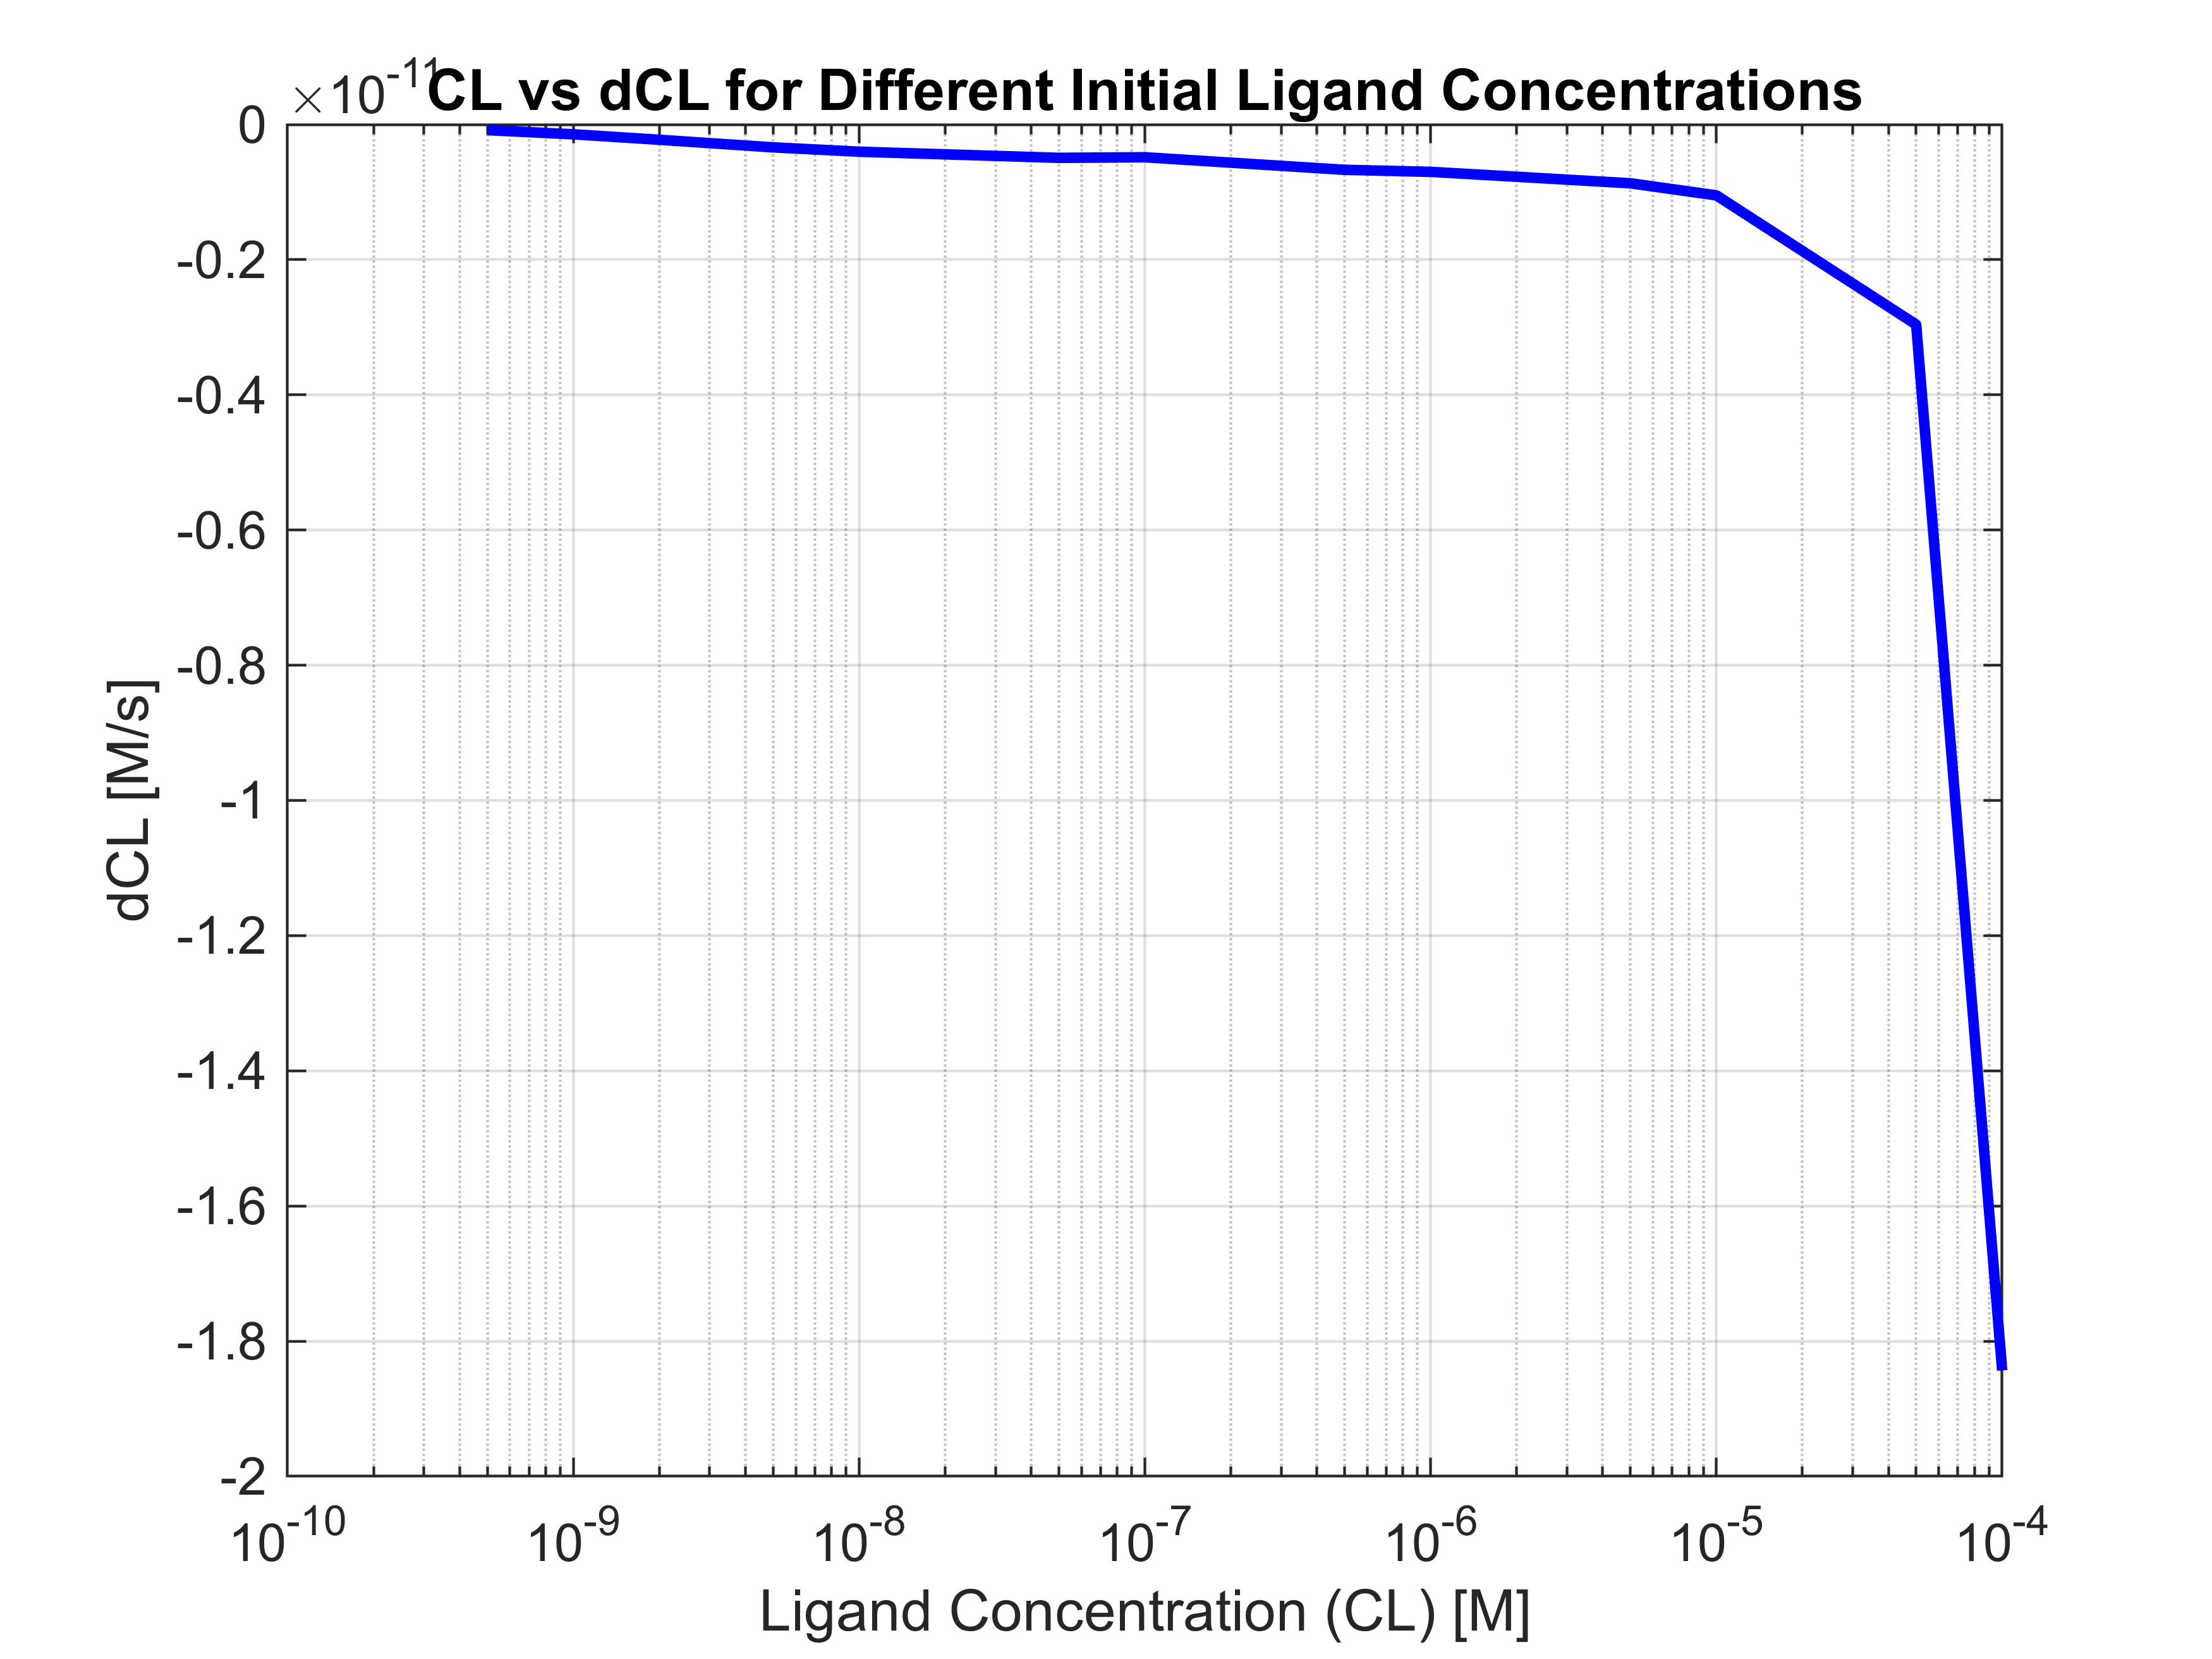

In [8]:
initial_CL_values = [5e-10, 1e-9, 2e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5, 1e-4]; % Units of Molar
CL_values = zeros(length(initial_CL_values), 1);
dCL_values = zeros(length(initial_CL_values), 1);

figure;
for i = 1:length(initial_CL_values)
    % Parameters
    k1 = 7.2e7; % M^-1 min^-1
    k_neg1 = 0.3; % min^-1
    keR = 0.03; % min^-1
    keC = 0.3; % min^-1
    krec = 0.08; % min^-1
    kdegR = 0.0022; % min^-1
    kdegL = 0.01; % min^-1
    fR = 0.2; % ratio
    fL = 0.5; % ratio
    NA = 6.022e23; % mol^-1
    nc = 1e9; % cells/mL
    Vs = 6.9886; % receptors per cell per second

    Y0 = [initial_CL_values(i); 0; 0; 0]; % initial conditions
    tspan = [0, 240]; % in seconds
    [t, Y] = ode45(@receptor_dynamics, tspan, Y0); % solve differential equation
    % extract variable values
    CL = Y(:, 1);
    NCs = Y(:, 2);
    NRi = Y(:, 3);
    NLi = Y(:, 4);
    NRs = 50000 - NCs - NRi; % Calculate NRs

    final_CL = CL(end);
    final_NRs = NRs(end); % Final NRs
    final_NCs = NCs(end); % Final NCs
    final_NLi = NLi(end); % Final NLi

    % Calculate dCL based on the formula
    dCL = (nc / NA) * (-k1 * final_CL * final_NRs + k_neg1 * final_NCs + krec * (1 - fL) * final_NLi);

    % Store the final values
    CL_values(i) = initial_CL_values(i);
    dCL_values(i) = dCL;
end

figure;
semilogx(CL_values, dCL_values, 'LineWidth', 2, 'MarkerSize', 8, 'Color', 'b');
xlabel('Ligand Concentration (CL) [M]');
ylabel('dCL [M/s]');
title('CL vs dCL for Different Initial Ligand Concentrations');
grid on;

## Part E


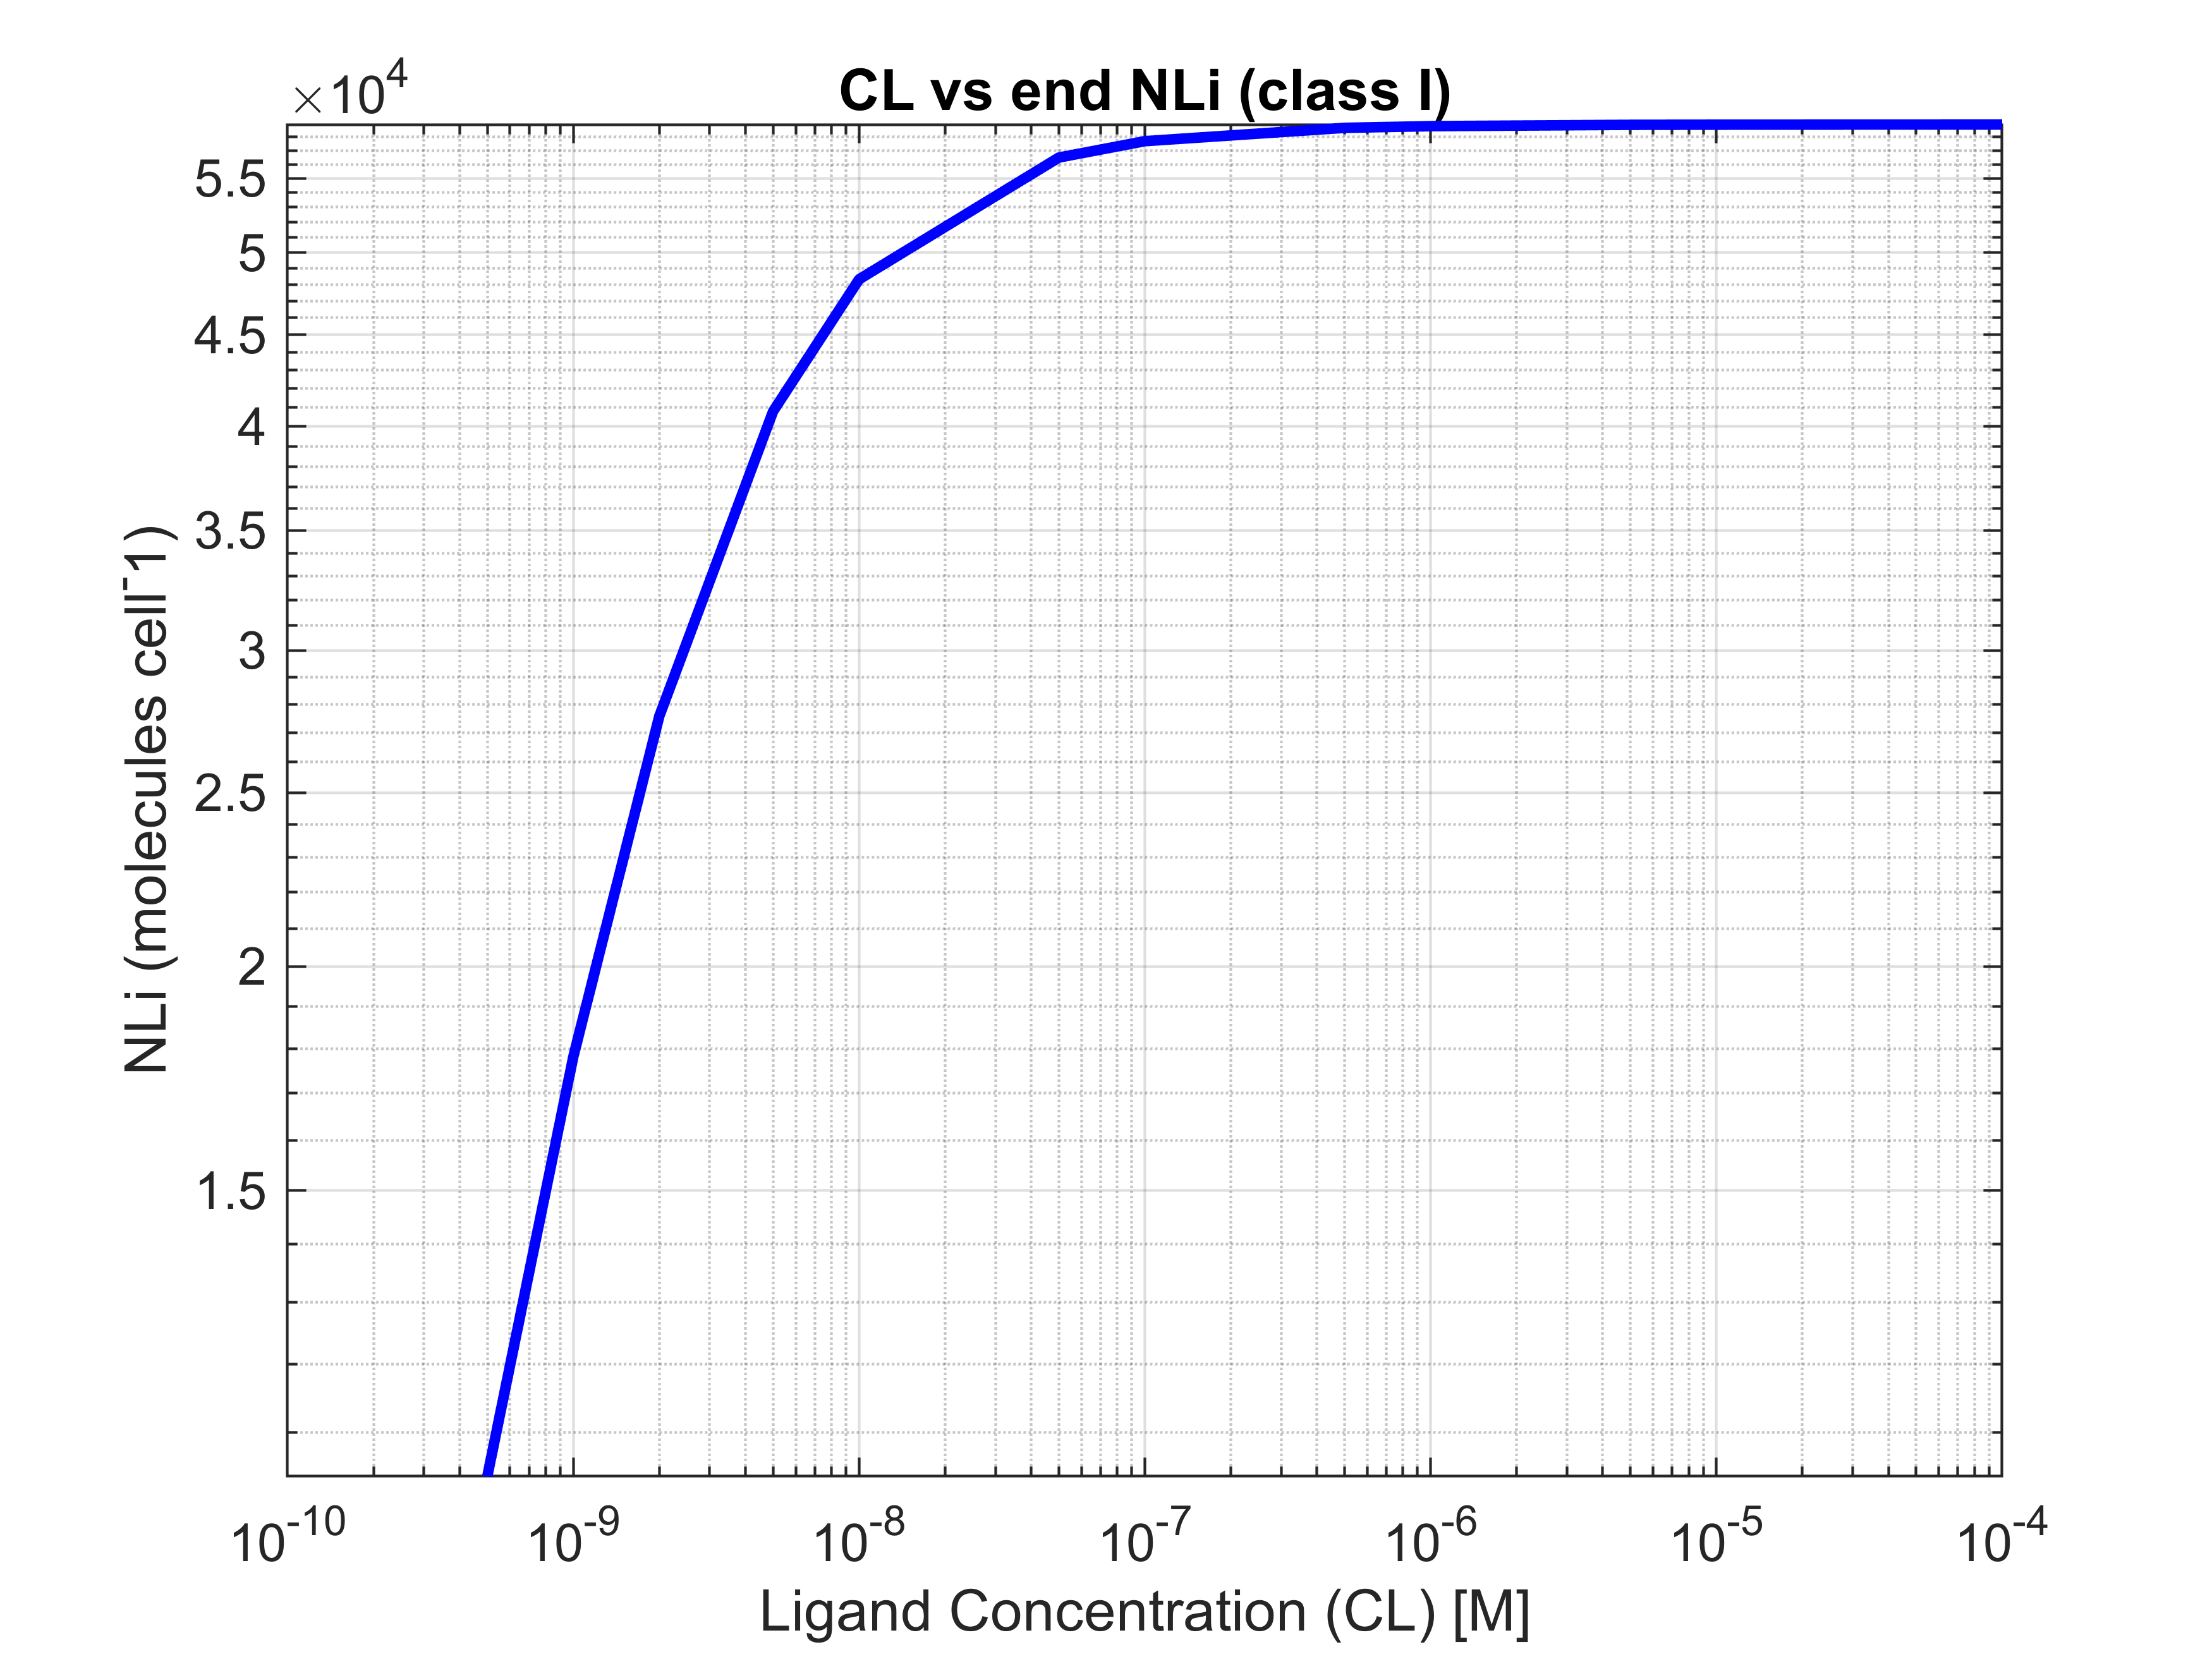

In [9]:
function dYdt = receptor_dynamic_1(t, Y)
    % Parameters
    k1 = 7.2e7; % M^-1 min^-1
    k_neg1 = 0.3; % min^-1
    keR = 0.03; % min^-1
    keC = 0.3; % min^-1
    krec = 0.08; % min^-1
    kdegR = 0.0022; % min^-1
    kdegL = 0.01; % min^-1
    fR = 0.2; % ratio
    fL = 0.5; % ratio
    NA = 6.022e23; % mol^-1
    nc = 1e9; % cells/mL
    Vs = 6.9886; % receptors per cell per second

    % Variables: Y = [CL, NCs, NRi, NLi]
    CL = Y(1); % Ligand concentration
    NCs = Y(2); % Receptor-ligand complex
    NRi = Y(3); % Intracellular receptor
    NLi = Y(4); % Intracellular ligand

    NRs = 50000 - NCs - NRi; % Surface receptor

    % Differential equations
    dNRs = -k1 * CL * NRs + k_neg1 * NCs - keR * NRs + (1 - fR) * krec * NRi + Vs;
    dNCs = k1 * CL * NRs - (k_neg1 + keC) * NCs;
    dNRi = keR * NRs + keC * NCs - (kdegR * fR + (1 - fR) * krec) * NRi;
    dNLi = keC * NCs - NLi * (kdegL * fL + (1 - fL) * krec);
    dCL = (nc / NA) * (-k1 * CL * NRs + k_neg1 * NCs + krec * (1 - fL) * NLi);

    % Return derivatives
    dYdt = [dCL; dNCs; dNRi; dNLi];
end

function dYdt = receptor_dynamic_low(t, Y)
    % Parameters
    k1 = 7.2e7; % M^-1 min^-1
    k_neg1 = 0.3; % min^-1
    keR = 0.03; % min^-1
    keC = 0.3; % min^-1
    krec = 0.08; % min^-1
    kdegR = 0.0022; % min^-1
    kdegL = 0.01; % min^-1
    fR = 0.2; % ratio
    fL = 0.5; % ratio
    NA = 6.022e23; % mol^-1
    nc = 1e9; % cells/mL
    Vs = 6.9886; % receptors per cell per second

    % Variables: Y = [CL, NCs, NRi, NLi]
    CL = Y(1); % Ligand concentration
    NCs = Y(2); % Receptor-ligand complex
    NRi = Y(3); % Intracellular receptor
    NLi = Y(4); % Intracellular ligand

    NRs = 50000 - NCs - NRi; % Surface receptor

    % Differential equations
    dNRs = -k1 * CL * NRs + k_neg1 * NCs - keR * NRs + (1 - fR) * krec * NRi + Vs;
    dNCs = k1 * CL * NRs - (k_neg1 + keC) * NCs;
    dNRi = keR * NRs + keC * NCs - (kdegR * fR + (1 - fR) * krec) * NRi;
    dNLi = keC * NCs - NLi * (kdegL * fL + (1 - fL) * krec);
    dCL = (nc / NA) * (-k1 * CL * NRs + k_neg1 * NCs + krec * (1 - fL) * NLi);

    % Return derivatives
    dYdt = [dCL; dNCs; dNRi; dNLi];
end

function dYdt = receptor_dynamic_high(t, Y)
    % Parameters
    k1 = 7.2e7; % M^-1 min^-1
    k_neg1 = 0.3; % min^-1
    keR = 0.03; % min^-1
    keC = 0.3; % min^-1
    krec = 0.08; % min^-1
    kdegR = 0.0022; % min^-1
    kdegL = 0.01; % min^-1
    fR = 0.2; % ratio
    fL = 0.5; % ratio
    NA = 6.022e23; % mol^-1
    nc = 1e9; % cells/mL
    Vs = 6.9886; % receptors per cell per second

    % Variables: Y = [CL, NCs, NRi, NLi]
    CL = Y(1); % Ligand concentration
    NCs = Y(2); % Receptor-ligand complex
    NRi = Y(3); % Intracellular receptor
    NLi = Y(4); % Intracellular ligand

    NRs = 50000 - NCs - NRi; % Surface receptor

    % Differential equations
    dNRs = -k1 * CL * NRs + k_neg1 * NCs - keR * NRs + (1 - fR) * krec * NRi + Vs;
    dNCs = k1 * CL * NRs - (k_neg1 + keC) * NCs;
    dNRi = keR * NRs + keC * NCs - (kdegR * fR + (1 - fR) * krec) * NRi;
    dNLi = keC * NCs - NLi * (kdegL * fL + (1 - fL) * krec);
    dCL = (nc / NA) * (-k1 * CL * NRs + k_neg1 * NCs + krec * (1 - fL) * NLi);

    % Return derivatives
    dYdt = [dCL; dNCs; dNRi; dNLi];
end

initial_CL_values = [5e-10, 1e-9, 2e-9, 5e-9, 1e-8, 5e-8, 1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5, 1e-4]; % Units of Molar
CL_values_1 = zeros(length(initial_CL_values), 1);
final_NLi_values_1 = zeros(length(initial_CL_values), 1);
CL_values_low = zeros(length(initial_CL_values), 1);
final_NLi_values_low = zeros(length(initial_CL_values), 1);
CL_values_high = zeros(length(initial_CL_values), 1);
final_NLi_values_high = zeros(length(initial_CL_values), 1);

figure;
for i = 1:length(initial_CL_values)
    Y0 = [initial_CL_values(i); 0; 0; 0]; % initial conditions
    tspan = [0, 240]; % in seconds
    [t, Y] = ode45(@receptor_dynamic_1, tspan, Y0); % solve differential equation
    % extract variable values
    CL = Y(:, 1);
    NCs = Y(:, 2);
    NRi = Y(:, 3);
    NLi = Y(:, 4);
    NRs = 50000 - NCs - NRi; % Calculate NRs

    final_CL = CL(end);
    final_NRs = NRs(end); % Final NRs
    final_NCs = NCs(end); % Final NCs
    final_NLi = NLi(end); % Final NLi
    final_NLi_values_1(i) = final_NLi;
    CL_values_1(i) = initial_CL_values(i);

    [t, Y] = ode45(@receptor_dynamic_low, tspan, Y0); % solve differential equation
    % extract variable values
    CL = Y(:, 1);
    NCs = Y(:, 2);
    NRi = Y(:, 3);
    NLi = Y(:, 4);
    NRs = 50000 - NCs - NRi; % Calculate NRs

    final_CL = CL(end);
    final_NRs = NRs(end); % Final NRs
    final_NCs = NCs(end); % Final NCs
    final_NLi = NLi(end); % Final NLi
    final_NLi_values_low(i) = final_NLi;
    CL_values_low(i) = initial_CL_values(i);

    [t, Y] = ode45(@receptor_dynamic_high, tspan, Y0); % solve differential equation
    % extract variable values
    CL = Y(:, 1);
    NCs = Y(:, 2);
    NRi = Y(:, 3);
    NLi = Y(:, 4);
    NRs = 50000 - NCs - NRi; % Calculate NRs

    final_CL = CL(end);
    final_NRs = NRs(end); % Final NRs
    final_NCs = NCs(end); % Final NCs
    final_NLi = NLi(end); % Final NLi
    final_NLi_values_high(i) = final_NLi;
    CL_values_high(i) = initial_CL_values(i);
end

figure;
loglog(CL_values_1, final_NLi_values_1, 'LineWidth', 2, 'Color', 'b');
xlabel('Ligand Concentration (CL) [M]');
ylabel('NLi (molecules cell^-1)');
title('CL vs end NLi (class I)');
grid on;


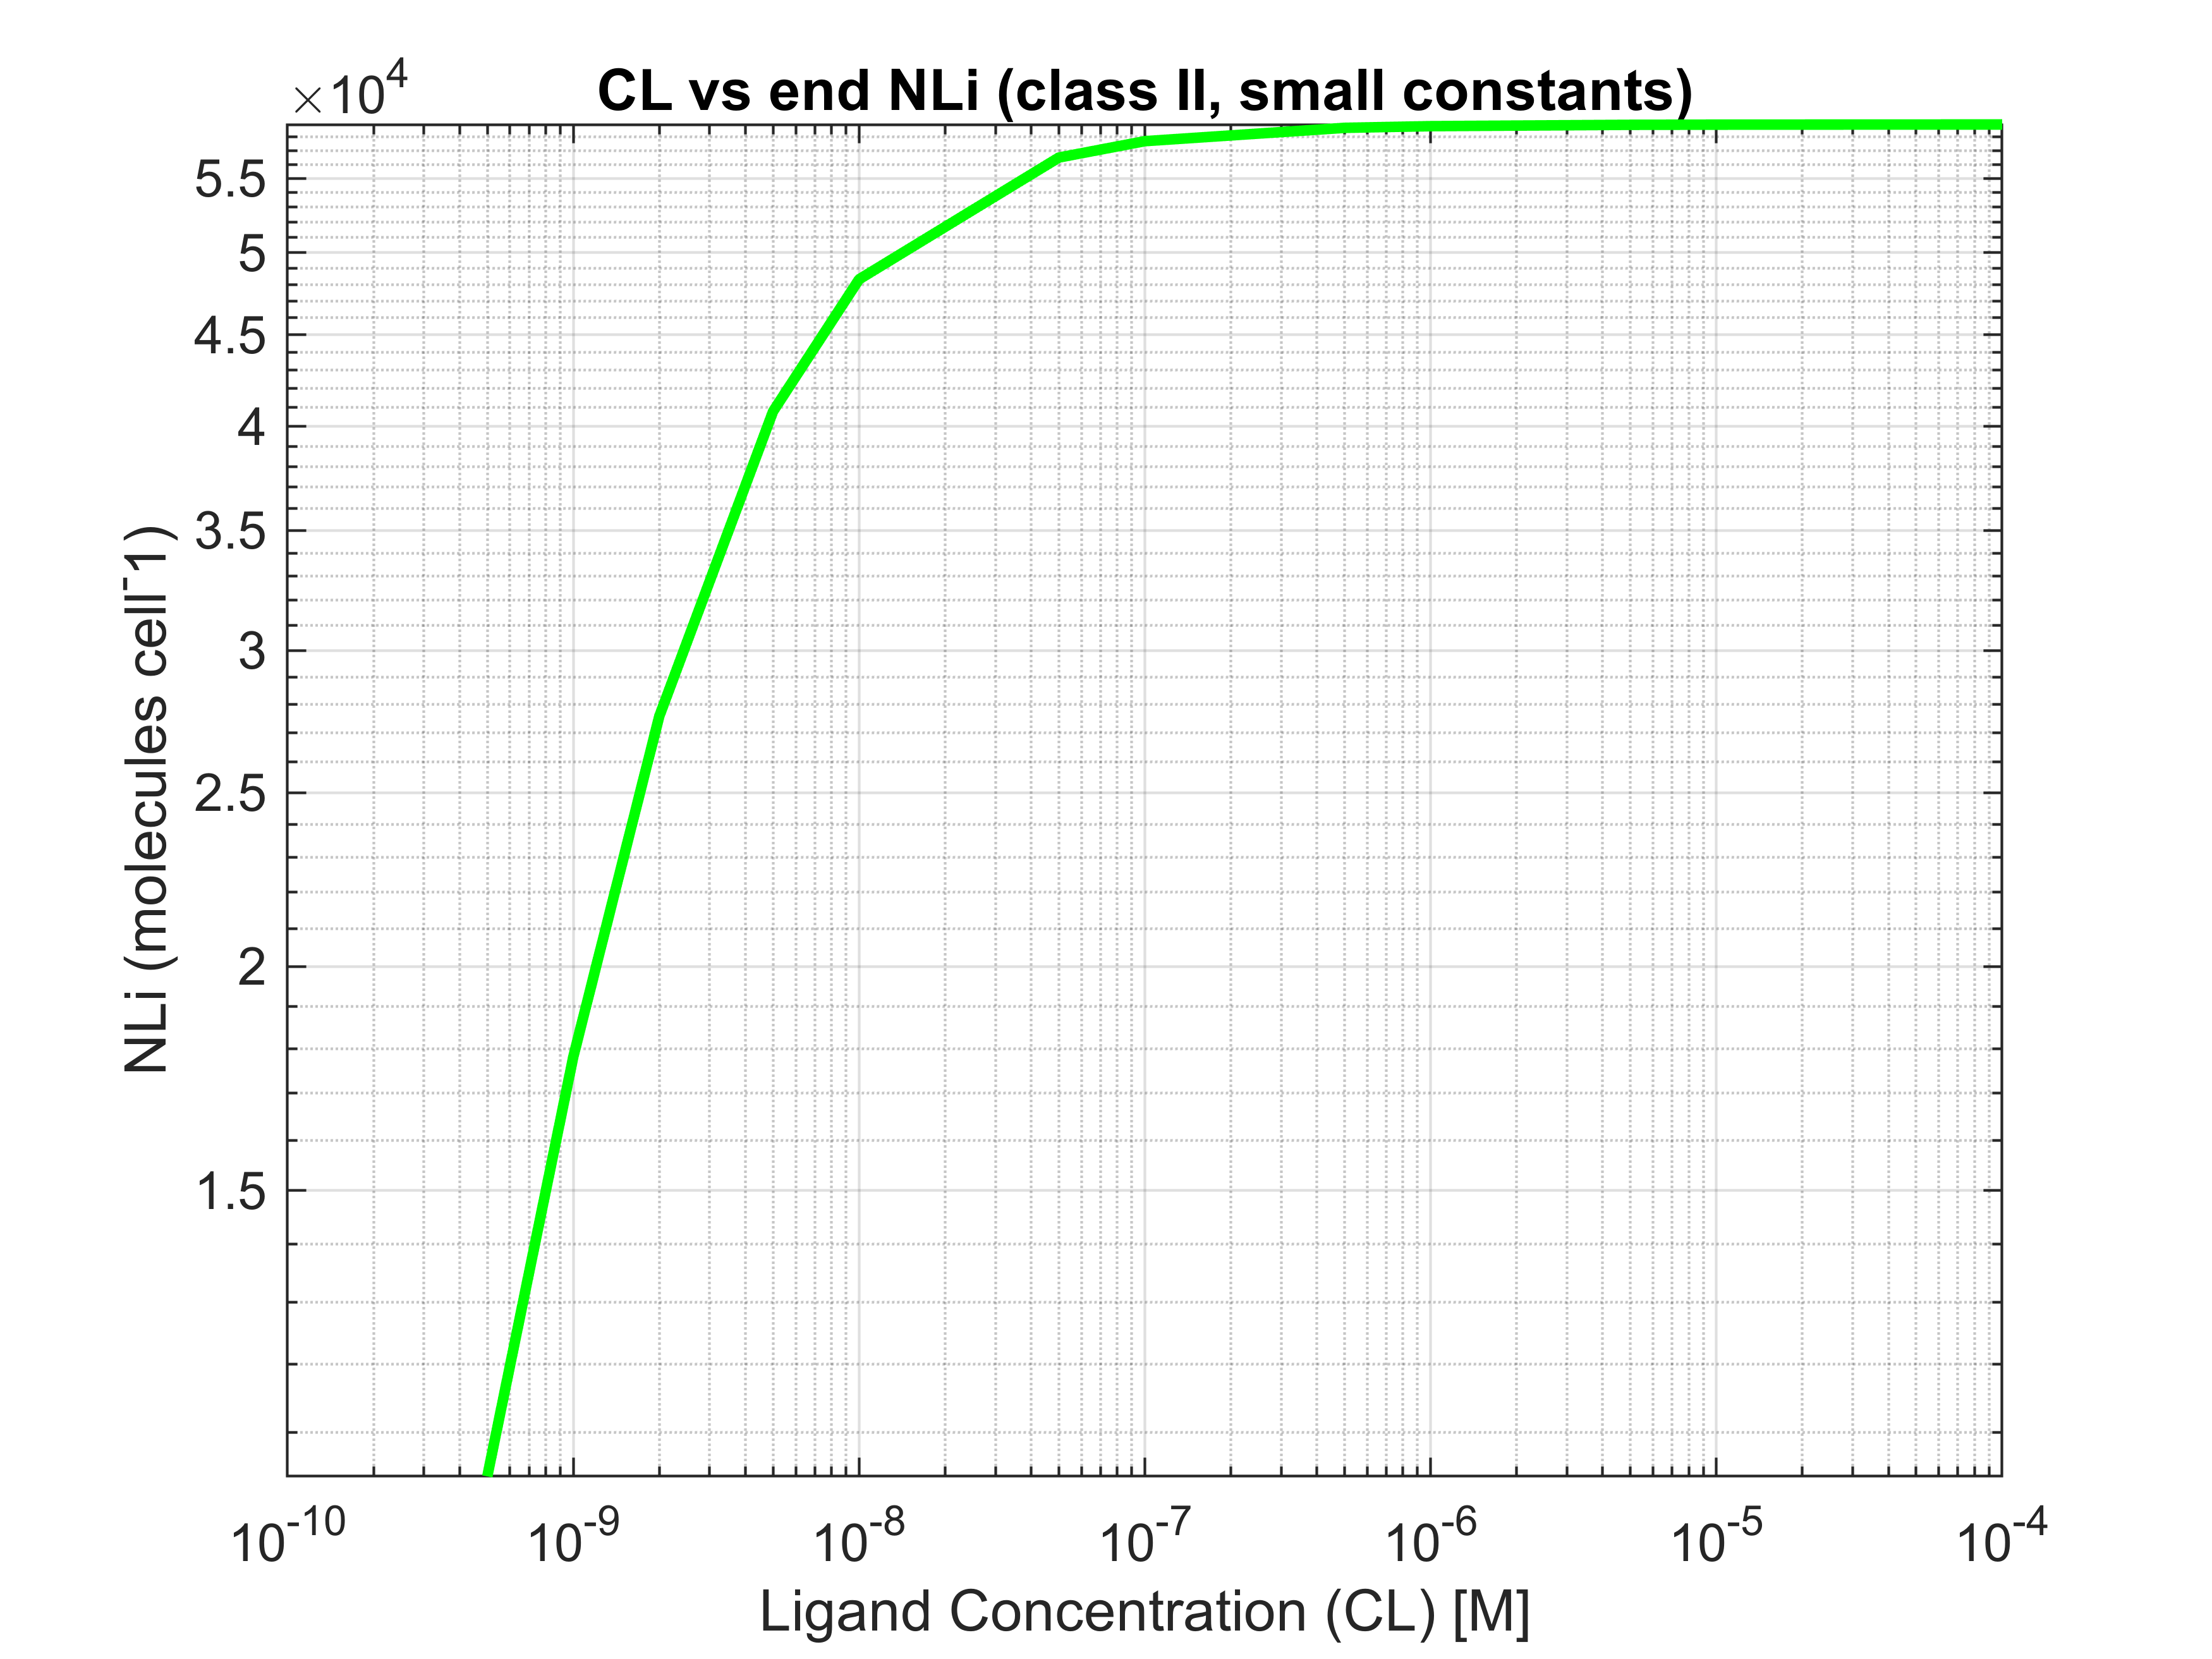

In [10]:

loglog(CL_values_low, final_NLi_values_low, 'LineWidth', 2, 'Color', 'g');
xlabel('Ligand Concentration (CL) [M]');
ylabel('NLi (molecules cell^-1)');
title('CL vs end NLi (class II, small constants)');
grid on;


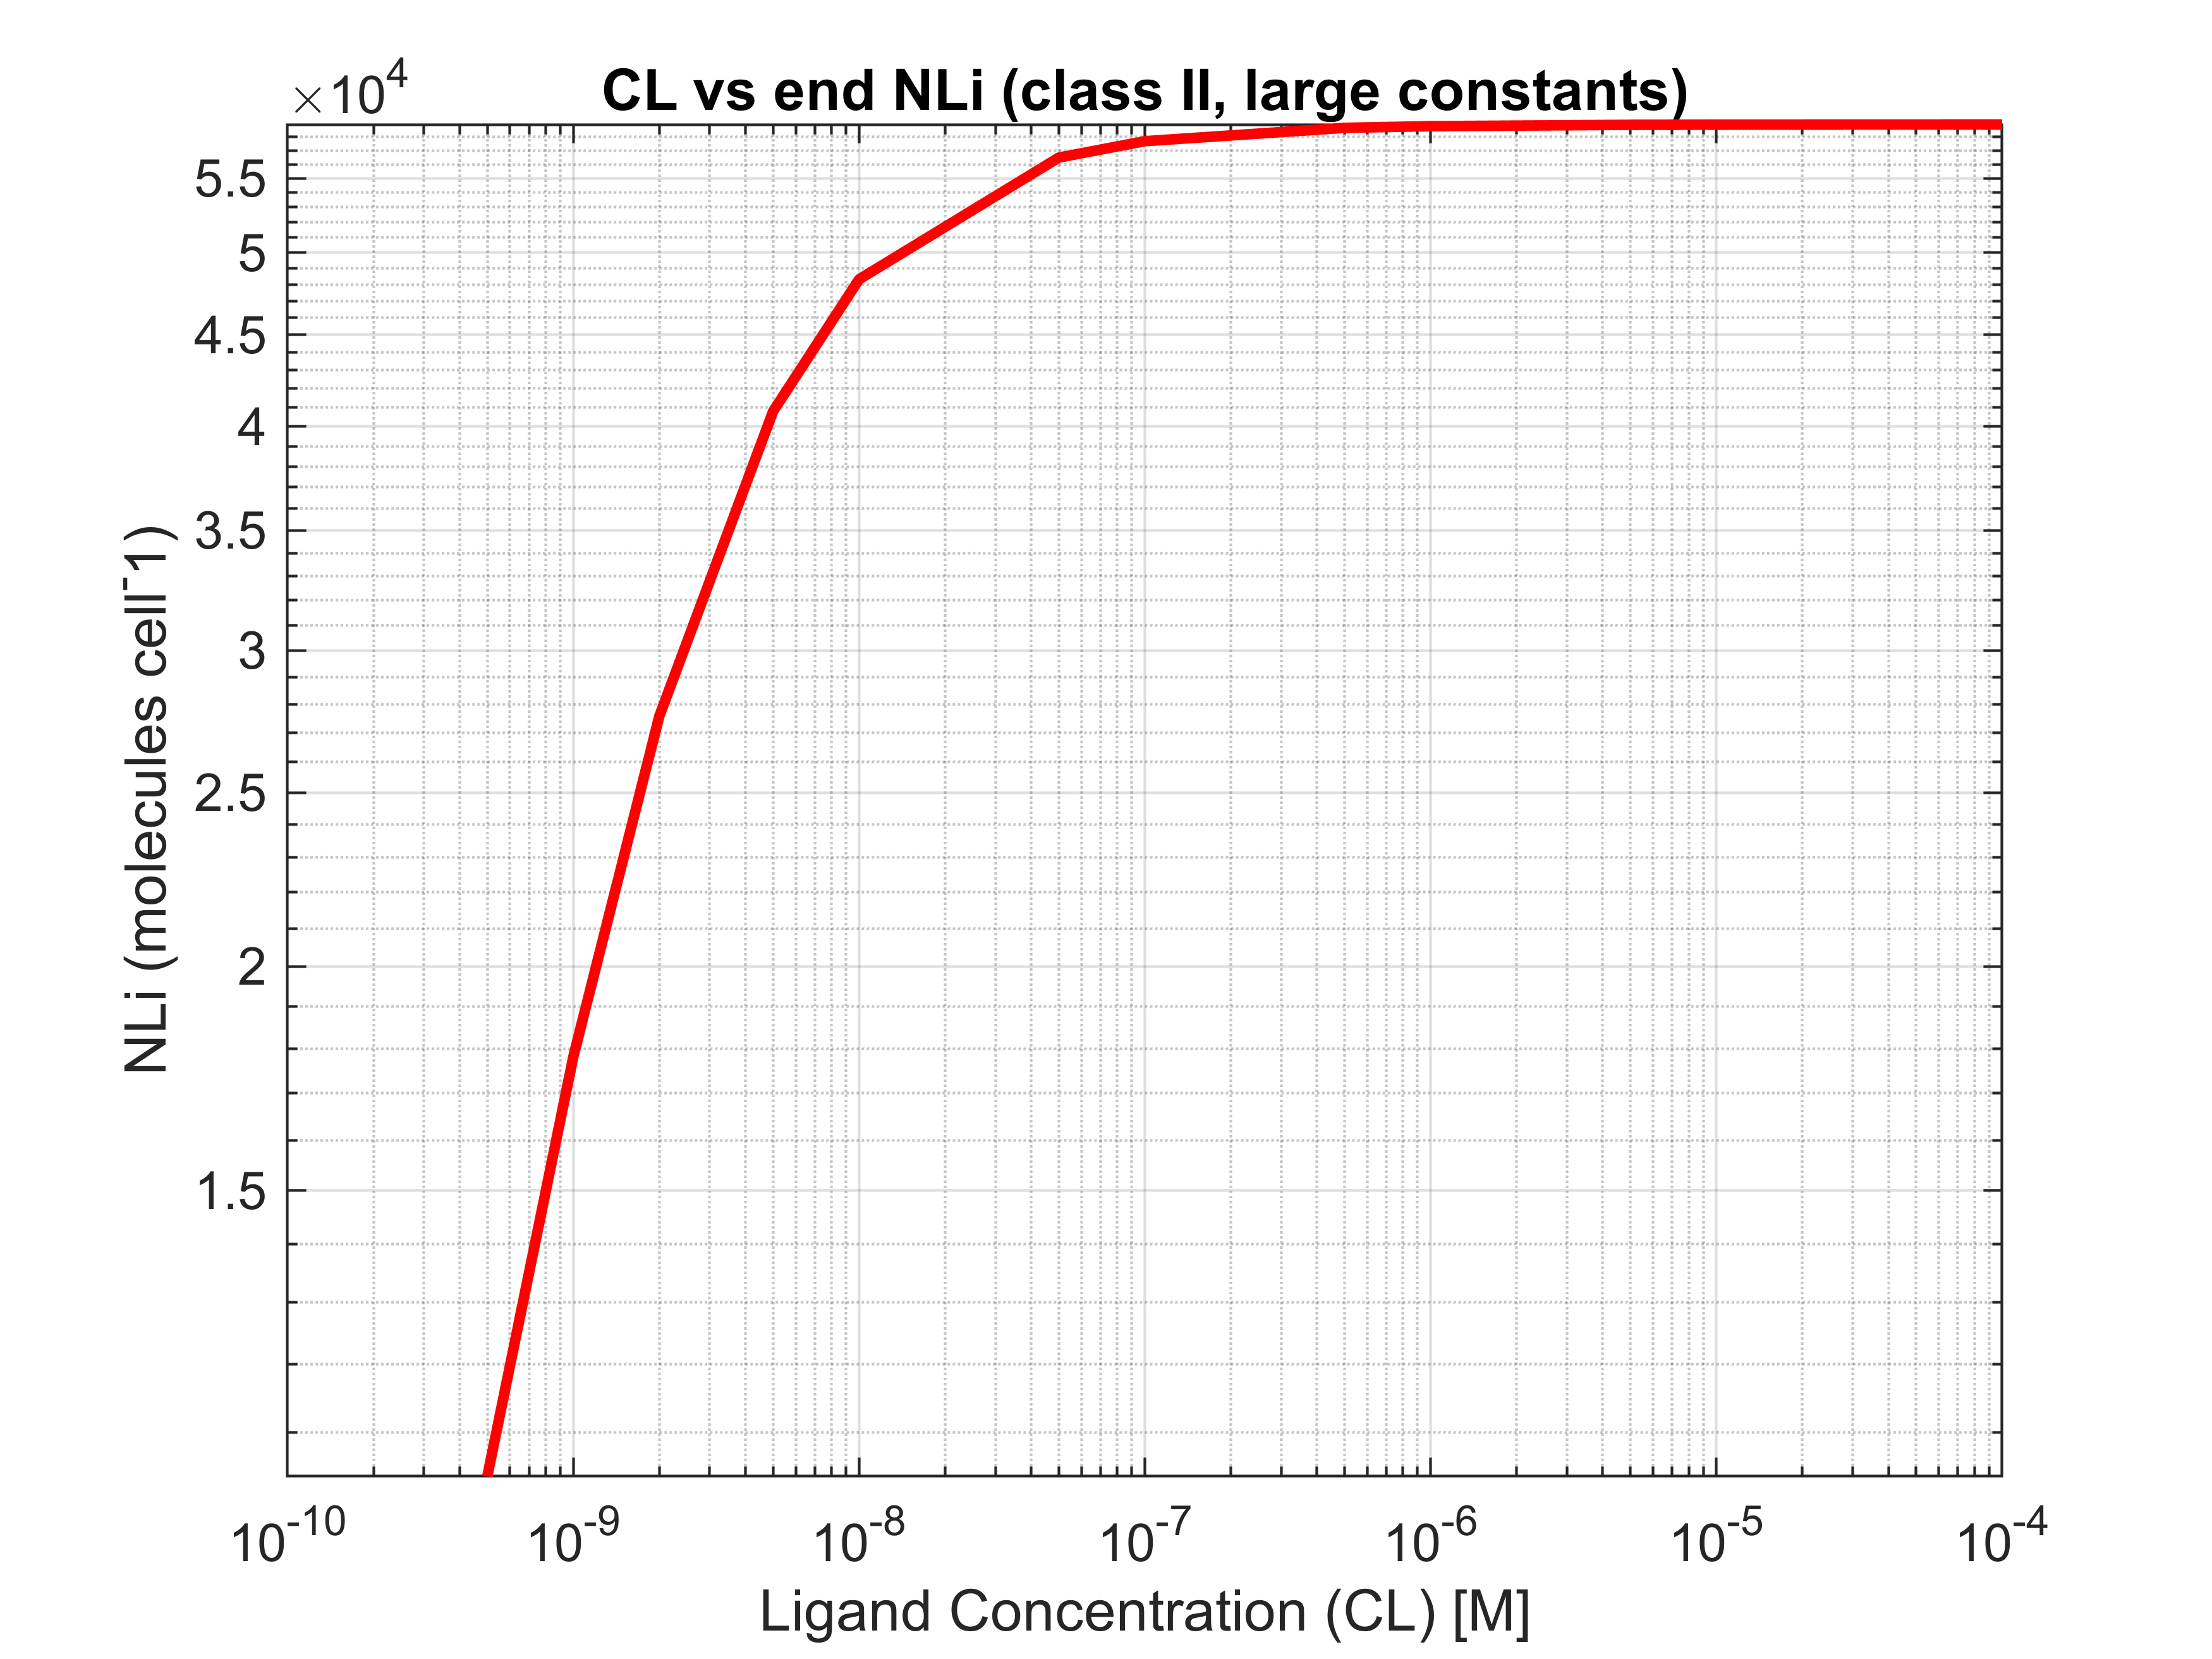

In [11]:

loglog(CL_values_high, final_NLi_values_high, 'LineWidth', 2, 'Color', 'r');
xlabel('Ligand Concentration (CL) [M]');
ylabel('NLi (molecules cell^-1)');
title('CL vs end NLi (class II, large constants)');
grid on;

## Part F


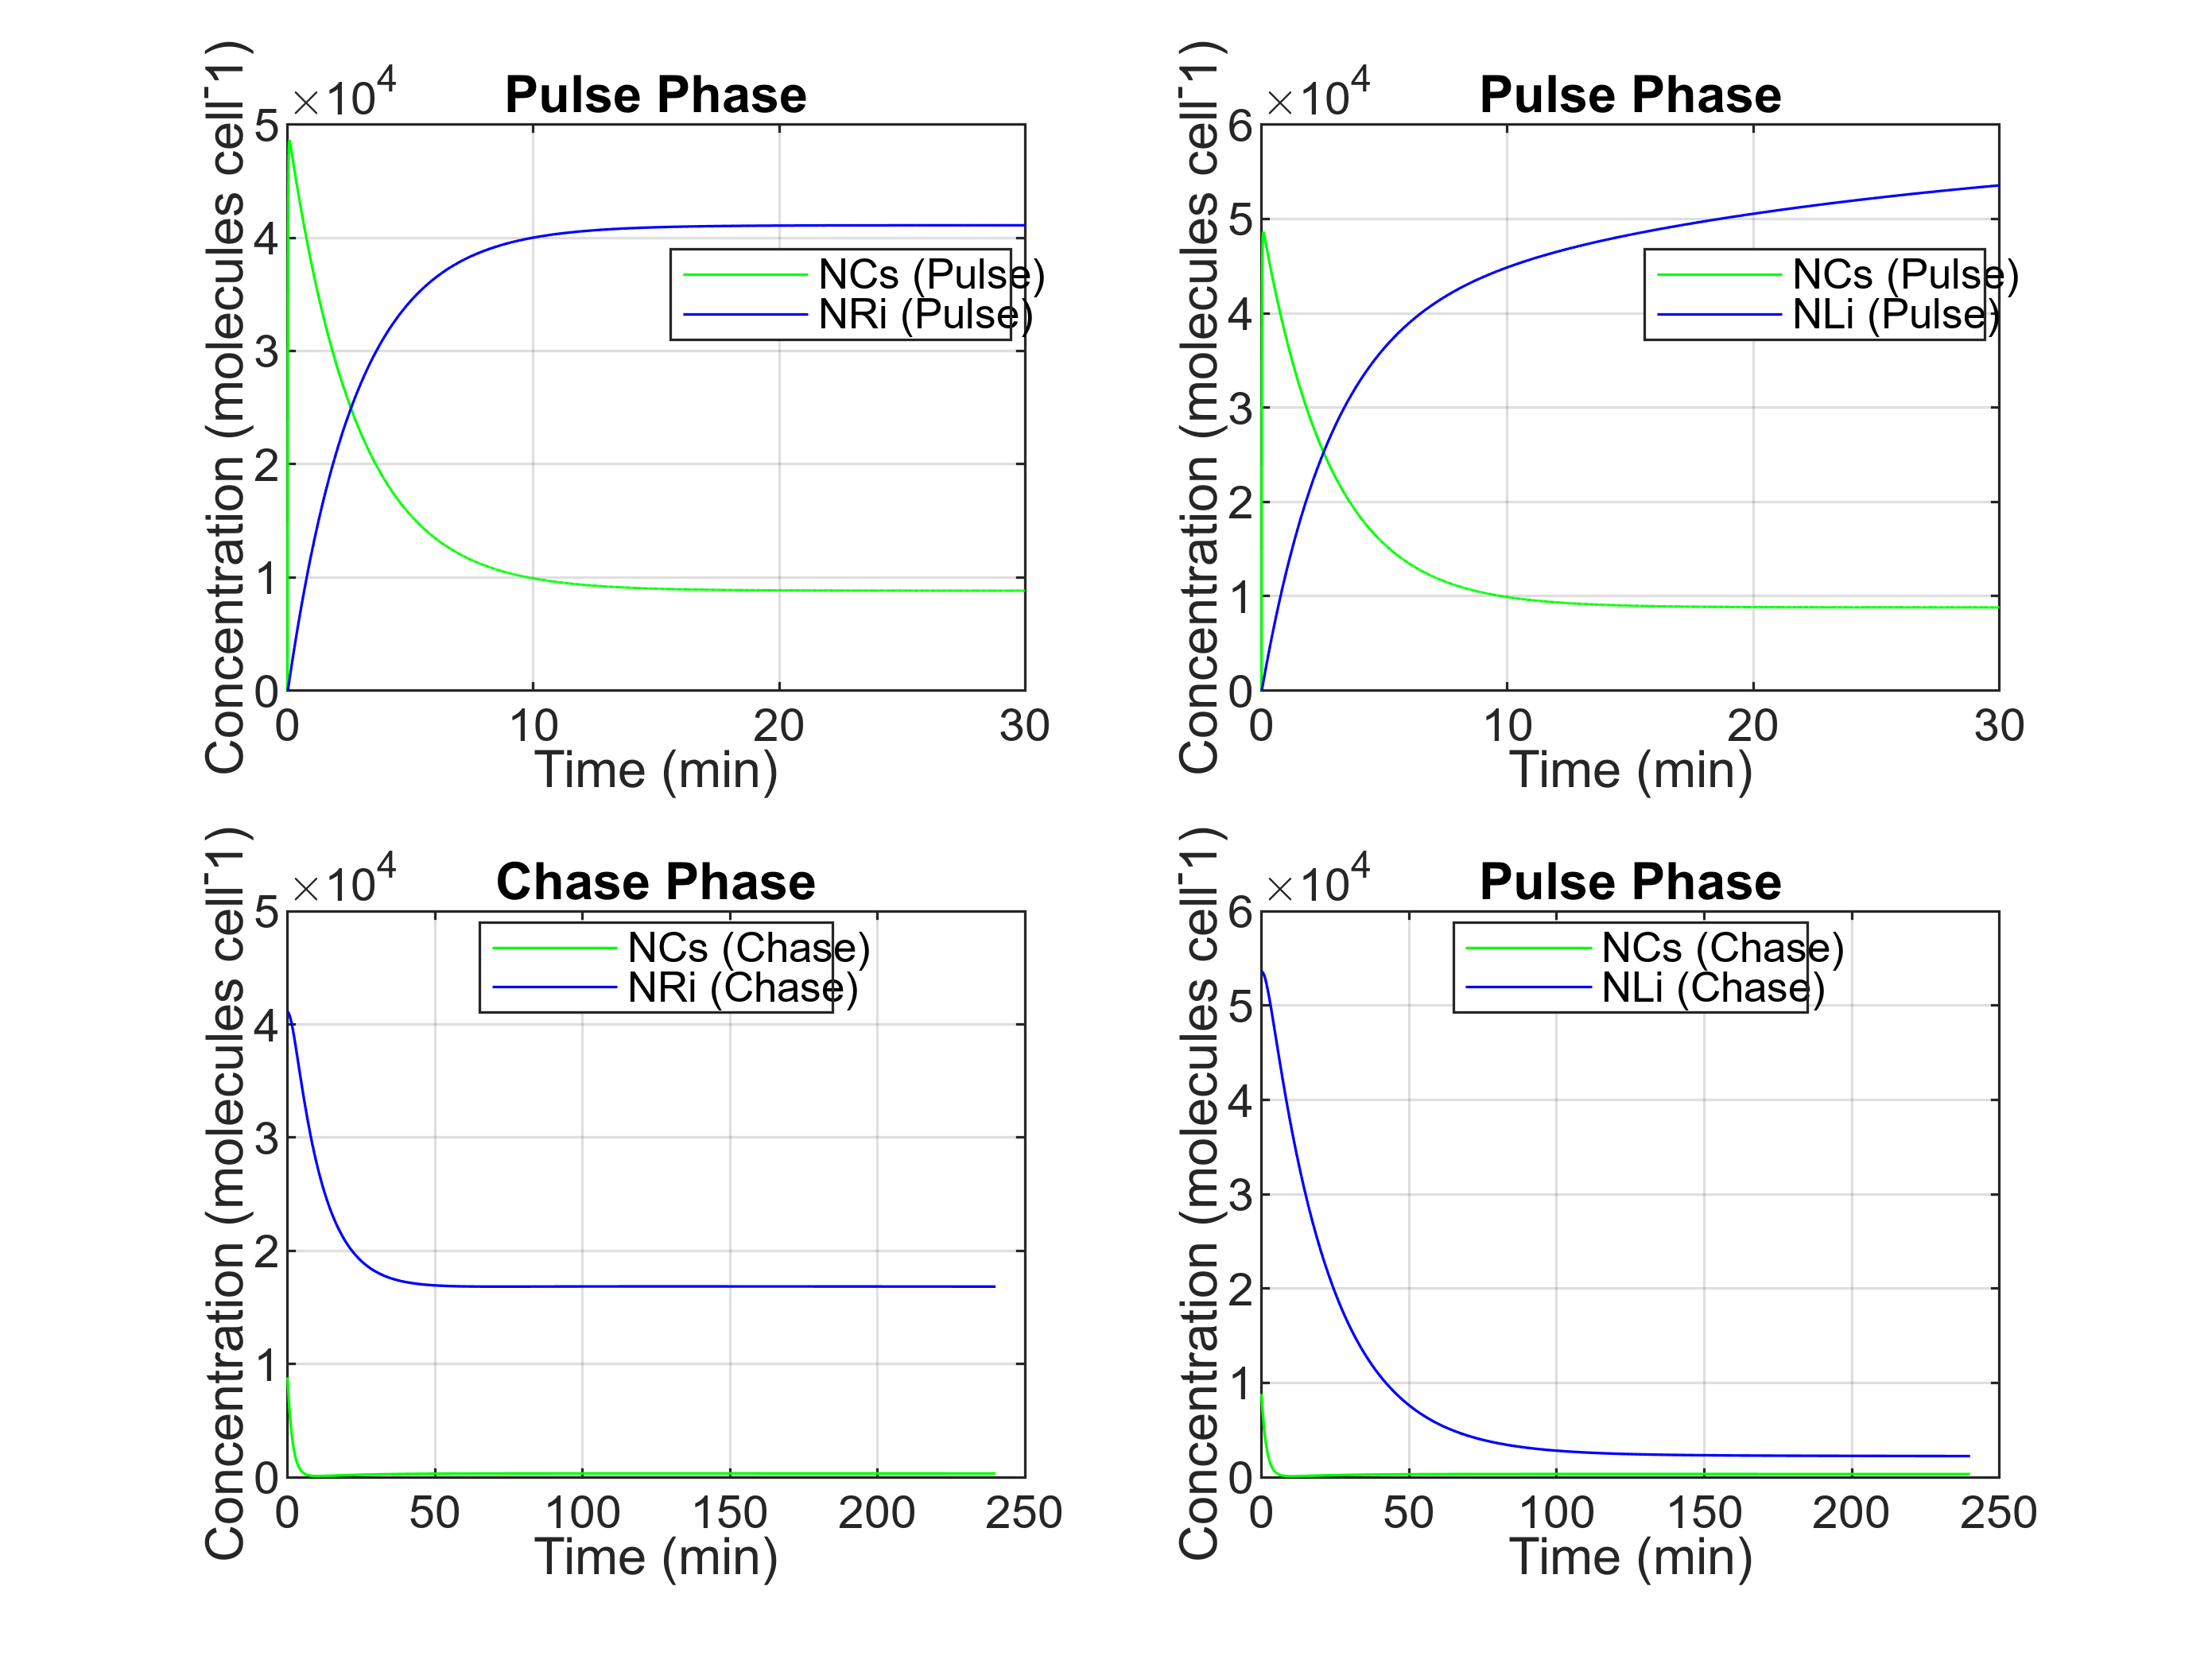

In [12]:
% Initial condition: High ligand concentration for pulse
Y0_pulse = [1e-6; 0; 0; 0]; % [CL, NCs, NRi, NLi]
tspan_pulse = [0, 30]; % Short pulse duration

% Solve ODE for pulse
[t_pulse, Y_pulse] = ode45(@receptor_dynamics, tspan_pulse, Y0_pulse);

% Extract final state as initial conditions for chase
final_pulse = Y_pulse(end, :); % [CL, NCs, NRi, NLi]

% Update initial condition for chase: Set CL to 0
Y0_chase = [0, final_pulse(2:end)]; % Set CL = 0
tspan_chase = [0, 240]; % Longer chase duration

% Solve ODE for chase
[t_chase, Y_chase] = ode45(@receptor_dynamics, tspan_chase, Y0_chase);

% plot results
figure;

% Pulse simulation results
subplot(2, 2, 1);
plot(t_pulse, Y_pulse(:, 2), '-g', 'DisplayName', 'NCs (Pulse)');
hold on;
plot(t_pulse, Y_pulse(:, 3), '-b', 'DisplayName', 'NRi (Pulse)');
xlabel('Time (min)');
ylabel('Concentration (molecules cell^-1)');
title('Pulse Phase');
legend('Location', 'best');
grid on;

subplot(2, 2, 2);
plot(t_pulse, Y_pulse(:, 2), '-g', 'DisplayName', 'NCs (Pulse)');
hold on;
plot(t_pulse, Y_pulse(:, 4), '-b', 'DisplayName', 'NLi (Pulse)');
xlabel('Time (min)');
ylabel('Concentration (molecules cell^-1)');
title('Pulse Phase');
legend('Location', 'best');
grid on;

% Chase simulation results
subplot(2, 2, 3);
plot(t_chase, Y_chase(:, 2), '-g', 'DisplayName', 'NCs (Chase)');
hold on;
plot(t_chase, Y_chase(:, 3), '-b', 'DisplayName', 'NRi (Chase)');
xlabel('Time (min)');
ylabel('Concentration (molecules cell^-1)');
title('Chase Phase');
legend('Location', 'best');
grid on;

subplot(2, 2, 4);
plot(t_chase, Y_chase(:, 2), '-g', 'DisplayName', 'NCs (Chase)');
hold on;
plot(t_chase, Y_chase(:, 4), '-b', 'DisplayName', 'NLi (Chase)');
xlabel('Time (min)');
ylabel('Concentration (molecules cell^-1)');
title('Pulse Phase');
legend('Location', 'best');
grid on;